## **Cuaderno de Calidad de Datos y Limpieza** 🎃

### **Importación de Librerías ⏰**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

### **Creación del Dataframe ⏰**

In [ ]:
data = {
    'ID_Empleado': [101, 102, 103, 104, 105, 106, 107, 108, 102, 109, 110],
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Marta', 'Sofía', 'Pedro', 'Lucía', 'Jorge', 'Luis', 'Elena', 'David'],
    'Edad': [28, 34, 29, 42, 35, 50, 23, 34, 34, 200, 25],
    'Departamento': ['Ventas', 'TI', 'Ventas', 'Marketing', 'TI', 'Recursos Humanos', 'Ventas', 'TI', 'TI', None, None],
    'Salario': [50000, 75000, 52000, np.nan, 78000, 65000, 48000, np.nan, 75000, 82000, 45000],
    'Email': ['ana@mail.com', 'luis@mail.com', 'carlos@mail.com', 'marta@mail', 'sofia@mail.com', 'pedro@mail.com', 'lucia@mail.com', 'jorge@mail.com', 'luis@mail.com', 'elena@mail.com', 'david@mail.com']
}

df = pd.DataFrame(data)
df

,ID_Empleado,Nombre,Edad,Departamento,Salario,Email
0,101,Ana,28,Ventas,50000.0,ana@mail.com
1,102,Luis,34,TI,75000.0,luis@mail.com
2,103,Carlos,29,Ventas,52000.0,carlos@mail.com
3,104,Marta,42,Marketing,NaN,marta@mail
4,105,Sofía,35,TI,78000.0,sofia@mail.com
5,106,Pedro,50,Recursos Humanos,65000.0,pedro@mail.com
6,107,Lucía,23,Ventas,48000.0,lucia@mail.com
7,108,Jorge,34,TI,NaN,jorge@mail.com
8,102,Luis,34,TI,75000.0,luis@mail.com
9,109,Elena,200,None,82000.0,elena@mail.com


- **Exactitud**: Grado en que los datos representan correctamente la realidad. *Ejemplo: Una edad de 200 años en nuestro dataset es un problema de exactitud.*
- **Completitud**: Ausencia de valores nulos. *Ejemplo: El salario faltante para Jorge es un problema de completitud.*
- **Consistencia**: Coherencia de los datos. *Ejemplo: Si tuviéramos otro sistema donde el empleado con ID 102 pertenece a 'Ventas' en lugar de 'TI', sería un problema de consistencia.*
- **Validez**: Conformidad de los datos con reglas definidas. *Ejemplo: El email 'marta@mail' no sigue el formato estándar de un correo electrónico, es un problema de validez.*
- **Unicidad**: Ausencia de registros duplicados. *Ejemplo: El registro del empleado con ID 102 (Luis) aparece dos veces, es un problema de unicidad.*

### **Diagnóstico de Problemas ⏰**

In [ ]:
df.isnull().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,2
Salario,2
Email,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Empleado   11 non-null     int64  
 1   Nombre        11 non-null     object 
 2   Edad          11 non-null     int64  
 3   Departamento  9 non-null      object 
 4   Salario       9 non-null      float64
 5   Email         11 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 660.0+ bytes


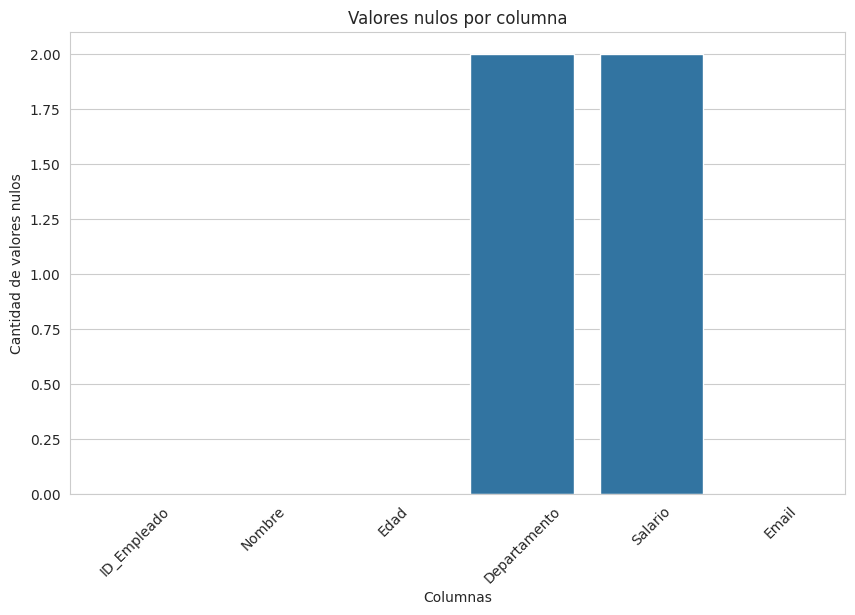

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.title('Valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45)
plt.savefig('valores_nulos.svg', dpi=400)
plt.show()


### **Manejo de Valores Faltantes (NAN) ⏰**

<Axes: xlabel='Salario', ylabel='Density'>

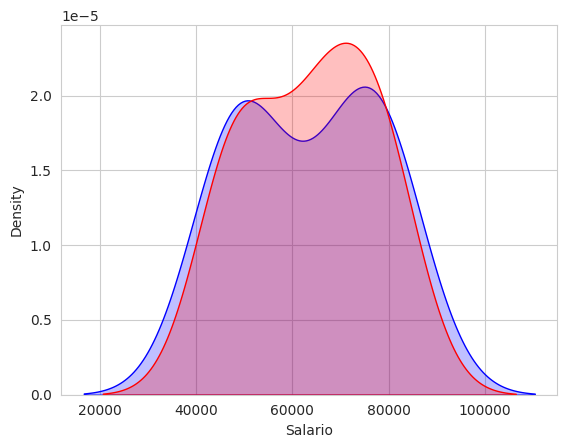

In [ ]:
df_imputado = df.copy()

##Gráfica antes de imputar (limpiar) datos NAN
sns.kdeplot(df_imputado['Salario'].dropna(), fill=True, color='blue')

##Limpiar con la mediana
df_imputado['Salario'].fillna(df_imputado['Salario'].median(), inplace=True)

##Gráfica después de imputar
sns.kdeplot(df_imputado['Salario'], fill=True, color='red')

### **Detección de Outliers ⏰**

Text(0, 0.5, 'Edad')

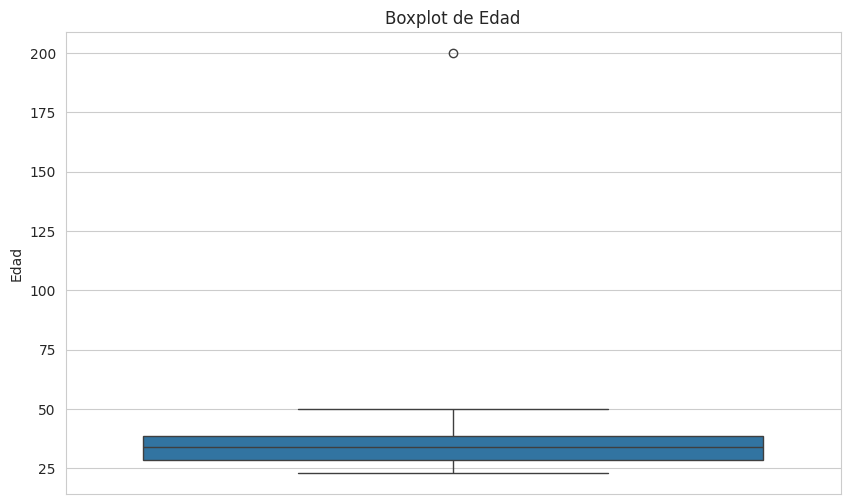

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_imputado['Edad'])
plt.title('Boxplot de Edad')
plt.ylabel('Edad')

<Axes: xlabel='Edad', ylabel='Density'>

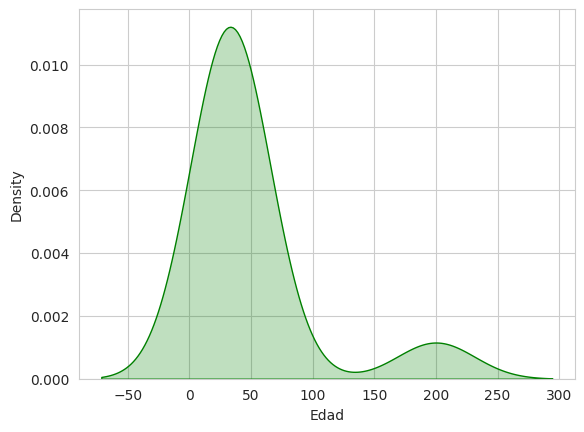

In [ ]:
sns.kdeplot(df_imputado['Edad'], fill=True, color='green')

In [ ]:
mediana_edad_razonable = df_imputado['Edad'].median()
df_imputado.loc[df_imputado['Edad'] > 100, 'Edad'] = mediana_edad_razonable

Text(0, 0.5, 'Edad')

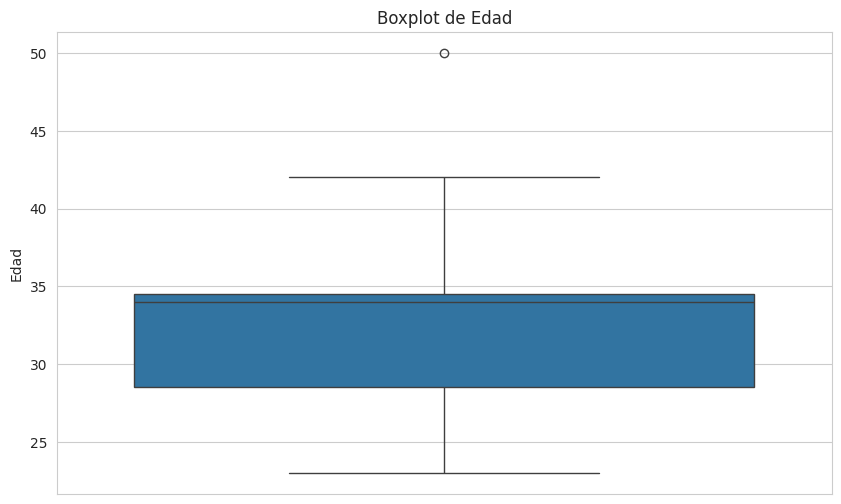

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_imputado['Edad'])
plt.title('Boxplot de Edad')
plt.ylabel('Edad')

In [ ]:
df_imputado.isna().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,2
Salario,0
Email,0


In [ ]:
##frecuencia relativa - % de participación de los datos con base en el dataframe
df_imputado['Departamento'].value_counts()/np.float64(len(df_imputado))*100

,count
Departamento,
TI,36.363636
Ventas,27.272727
Marketing,9.090909
Recursos Humanos,9.090909


In [ ]:
##frecuencia absoluta - conteo de datos por columna y categoria
df_imputado['Departamento'].value_counts()

,count
Departamento,
TI,4
Ventas,3
Marketing,1
Recursos Humanos,1


In [ ]:
moda_departamento = df_imputado['Departamento'].mode()[0]
df_imputado['Departamento'].fillna(moda_departamento, inplace=True)

In [ ]:
df_imputado.isna().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,0
Salario,0
Email,0


In [ ]:
df_imputado.describe()

,ID_Empleado,Edad,Salario
count,11.000000,11.000000,11.000000
mean,105.181818,33.454545,63636.363636
std,3.060006,7.620546,13116.956410
min,101.000000,23.000000,45000.000000
25%,102.500000,28.500000,51000.000000
50%,105.000000,34.000000,65000.000000
75%,107.500000,34.500000,75000.000000
max,110.000000,50.000000,82000.000000


In [ ]:
scaler_minmaxscaler = MinMaxScaler()
df_imputado['Salario_normalizado'] = scaler_minmaxscaler.fit_transform(df_imputado[['Salario']])
df_imputado['Edad_normalizado'] = scaler_minmaxscaler.fit_transform(df_imputado[['Edad']])

In [ ]:
df_imputado.describe()

,ID_Empleado,Edad,Salario,Salario_normalizado,Edad_normalizado
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,105.181818,33.454545,63636.363636,0.503686,0.387205
std,3.060006,7.620546,13116.956410,0.354512,0.282242
min,101.000000,23.000000,45000.000000,0.000000,0.000000
25%,102.500000,28.500000,51000.000000,0.162162,0.203704
50%,105.000000,34.000000,65000.000000,0.540541,0.407407
75%,107.500000,34.500000,75000.000000,0.810811,0.425926
max,110.000000,50.000000,82000.000000,1.000000,1.000000


<Axes: xlabel='Edad', ylabel='Density'>

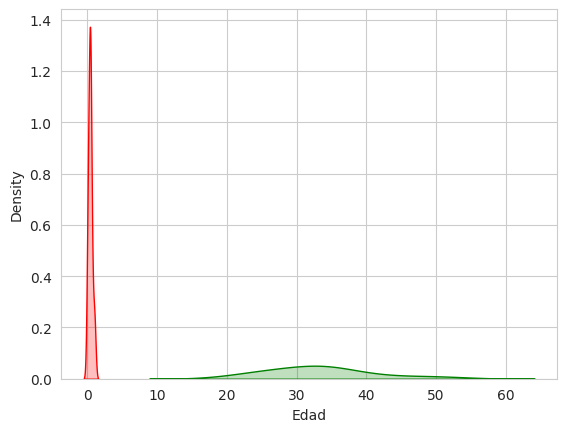

In [ ]:
sns.kdeplot(df_imputado['Edad'], fill=True, color='green')
sns.kdeplot(df_imputado['Edad_normalizado'], fill=True, color='red')

In [ ]:
scaler_std = StandardScaler()
df_imputado['Salario_estandarizado'] = scaler_std.fit_transform(df_imputado[['Salario']])
df_imputado['Edad_estandarizado'] = scaler_std.fit_transform(df_imputado[['Edad']])

<Axes: xlabel='Edad', ylabel='Density'>

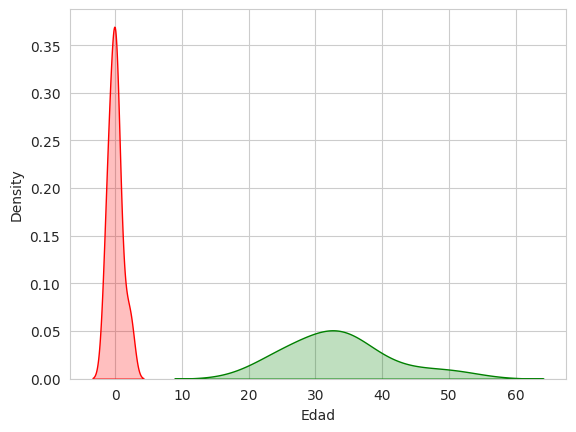

In [ ]:
sns.kdeplot(df_imputado['Edad'], fill=True, color='green')
sns.kdeplot(df_imputado['Edad_estandarizado'], fill=True, color='red')

In [ ]:
df_imputado.describe()

,ID_Empleado,Edad,Salario,Salario_normalizado,Edad_normalizado,Salario_estandarizado,Edad_estandarizado
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01
mean,105.181818,33.454545,63636.363636,0.503686,0.387205,-2.624164e-16,1.614870e-16
std,3.060006,7.620546,13116.956410,0.354512,0.282242,1.048809e+00,1.048809e+00
min,101.000000,23.000000,45000.000000,0.000000,0.000000,-1.490131e+00,-1.438850e+00
25%,102.500000,28.500000,51000.000000,0.162162,0.203704,-1.010381e+00,-6.818896e-01
50%,105.000000,34.000000,65000.000000,0.540541,0.407407,1.090340e-01,7.507041e-02
75%,107.500000,34.500000,75000.000000,0.810811,0.425926,9.086164e-01,1.438850e-01
max,110.000000,50.000000,82000.000000,1.000000,1.000000,1.468324e+00,2.277136e+00


In [ ]:
df_imputado

,ID_Empleado,Nombre,Edad,Departamento,Salario,Email,Salario_normalizado,Edad_normalizado,Salario_estandarizado,Edad_estandarizado
0,101,Ana,28,Ventas,50000.0,ana@mail.com,0.135135,0.185185,-1.090340,-0.750704
1,102,Luis,34,TI,75000.0,luis@mail.com,0.810811,0.407407,0.908616,0.075070
2,103,Carlos,29,Ventas,52000.0,carlos@mail.com,0.189189,0.222222,-0.930423,-0.613075
3,104,Marta,42,Marketing,65000.0,marta@mail,0.540541,0.703704,0.109034,1.176103
4,105,Sofía,35,TI,78000.0,sofia@mail.com,0.891892,0.444444,1.148491,0.212699
5,106,Pedro,50,Recursos Humanos,65000.0,pedro@mail.com,0.540541,1.000000,0.109034,2.277136
6,107,Lucía,23,Ventas,48000.0,lucia@mail.com,0.081081,0.000000,-1.250256,-1.438850
7,108,Jorge,34,TI,65000.0,jorge@mail.com,0.540541,0.407407,0.109034,0.075070
8,102,Luis,34,TI,75000.0,luis@mail.com,0.810811,0.407407,0.908616,0.075070
9,109,Elena,34,TI,82000.0,elena@mail.com,1.000000,0.407407,1.468324,0.075070


In [ ]:
##Eliminar duplicados
df_imputado.drop_duplicates(inplace=True)

In [ ]:
df_imputado

,ID_Empleado,Nombre,Edad,Departamento,Salario,Email,Salario_normalizado,Edad_normalizado,Salario_estandarizado,Edad_estandarizado
0,101,Ana,28,Ventas,50000.0,ana@mail.com,0.135135,0.185185,-1.090340,-0.750704
1,102,Luis,34,TI,75000.0,luis@mail.com,0.810811,0.407407,0.908616,0.075070
2,103,Carlos,29,Ventas,52000.0,carlos@mail.com,0.189189,0.222222,-0.930423,-0.613075
3,104,Marta,42,Marketing,65000.0,marta@mail,0.540541,0.703704,0.109034,1.176103
4,105,Sofía,35,TI,78000.0,sofia@mail.com,0.891892,0.444444,1.148491,0.212699
5,106,Pedro,50,Recursos Humanos,65000.0,pedro@mail.com,0.540541,1.000000,0.109034,2.277136
6,107,Lucía,23,Ventas,48000.0,lucia@mail.com,0.081081,0.000000,-1.250256,-1.438850
7,108,Jorge,34,TI,65000.0,jorge@mail.com,0.540541,0.407407,0.109034,0.075070
9,109,Elena,34,TI,82000.0,elena@mail.com,1.000000,0.407407,1.468324,0.075070
10,110,David,25,TI,45000.0,david@mail.com,0.000000,0.074074,-1.490131,-1.163591


In [ ]:
df_imputado.isna().sum()

,0
ID_Empleado,0
Nombre,0
Edad,0
Departamento,0
Salario,0
Email,0
Salario_normalizado,0
Edad_normalizado,0
Salario_estandarizado,0
Edad_estandarizado,0


In [ ]:
df_imputado.to_csv('datos_limpios.csv', index=False)


Codificación One Hot y Label Encoding